<h1><center>Arunaggiri Pandian Karunanidhi</center></h1>

In [71]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### A) Load the titanic.csv file into a Pandas data frame. Are there any missing values in the data frame? How many missing values occur for each of the columns?

In [72]:
df.shape

(891, 12)

In [73]:
print(df.isnull().sum())
print('-' * 125)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------------------------------------------------------------------------------------------------------------------------


#### Missing Values:
Age Column - 177 Missing Values<br>
Cabin Column - 686 Missing Values<br>
Embarked Column - 2 Missing Values<br>

#### B) What percent of the passengers survived? 

In [74]:
survived = df[df['Survived'] == 1]['Survived'].sum()
survived

342

In [75]:

# percent survived

percent = survived / df.shape[0]
# print("Percent of passengers survived: ", percent*100, "%")
print('Percent of passengers survived: %.2f' % (percent*100) ,'%')

Percent of passengers survived: 38.38 %


#### C) What was the maximum fare that was paid to purchase a ticket by a passenger? 

In [76]:
maximum = df['Fare'].max()
maximum

512.3292

In [77]:
df[df['Fare'] == maximum]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


The maximum fare that was paid to purchase a ticket by a passenger was 512.3292 <br>
Three passengers bought the tickets with maximum fare, and they all survived



#### D) How many unique places did the passengers embark from?

In [78]:
unique = df['Embarked'].unique()
print(unique)
print('The passengers embarked from', len(unique), 'unique places')
print('Three Places are known and 1 is unknown')

['S' 'C' 'Q' nan]
The passengers embarked from 4 unique places
Three Places are known and 1 is unknown


#### E) Using Scikit-Learn, normalize the values in the Age, SibSp, Parch, and Fare columns so that the range for each column is [0, 1].

In [79]:
from sklearn.preprocessing import MaxAbsScaler

In [80]:
# df_new = df['Age', 'SibSp', 'Parch', 'Fare']
df_new = df[['Age', 'SibSp', 'Parch', 'Fare']].copy()

In [81]:
df_new.dtypes

Age      float64
SibSp      int64
Parch      int64
Fare     float64
dtype: object

In [82]:
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df_new)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df_new)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df_new.columns)

# visualize the data frame
df_scaled

,Age,SibSp,Parch,Fare
0,0.2750,0.125,0.000000,0.014151
1,0.4750,0.125,0.000000,0.139136
2,0.3250,0.000,0.000000,0.015469
3,0.4375,0.125,0.000000,0.103644
4,0.4375,0.000,0.000000,0.015713
...,...,...,...,...
886,0.3375,0.000,0.000000,0.025374
887,0.2375,0.000,0.000000,0.058556
888,NaN,0.125,0.333333,0.045771
889,0.3250,0.000,0.000000,0.058556


In [18]:
df['Age'] = df_scaled['Age']
df['SibSp'] = df_scaled['SibSp']
df['Parch'] = df_scaled['Parch']
df['Fare'] = df_scaled['Fare']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.275,0.125,0.0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.475,0.125,0.0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.325,0.000,0.0,STON/O2. 3101282,0.015469,NaN,S


#### F) Label encode the values in the Pclass, Sex, and Embarked columns. <br>


In [19]:
unique = df['Pclass'].unique()
unique

array([3, 1, 2], dtype=int64)

Let's label encode the Sex column: <br>
Male   --> 1 <br>
Female --> 0 <br>

In [20]:
# for 'Sex' Column

# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])

df['Sex'].unique()

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.2750,0.125,0.000000,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,0.125,0.000000,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.3250,0.000,0.000000,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,0.125,0.000000,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0.4375,0.000,0.000000,373450,0.015713,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0.000,0.000000,330877,0.016510,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.6750,0.000,0.000000,17463,0.101229,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.0250,0.375,0.166667,349909,0.041136,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.3375,0.000,0.333333,347742,0.021731,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.1750,0.125,0.000000,237736,0.058694,NaN,C


In [21]:
# for 'Embarked' Column

# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

df['Embarked'].unique()

array([2, 0, 1, 3])

Missing (NaN) Values in Embarked column is replaced by the value '3' <Br>

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.2750,0.125,0.000000,A/5 21171,0.014151,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,0.125,0.000000,PC 17599,0.139136,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.3250,0.000,0.000000,STON/O2. 3101282,0.015469,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,0.125,0.000000,113803,0.103644,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.4375,0.000,0.000000,373450,0.015713,NaN,2
5,6,0,3,"Moran, Mr. James",1,NaN,0.000,0.000000,330877,0.016510,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.6750,0.000,0.000000,17463,0.101229,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.0250,0.375,0.166667,349909,0.041136,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.3375,0.000,0.333333,347742,0.021731,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.1750,0.125,0.000000,237736,0.058694,NaN,0


In [23]:
# for 'Pclass' Column

# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Pclass']= label_encoder.fit_transform(df['Pclass'])

df['Pclass'].unique()

array([2, 0, 1], dtype=int64)

#### G) Partition the titanic data set so that a random sample of 80% of the data will be used for training and 20% will be used for testing your machine learning model. 

Age Column has still has missing values so, let's replace it by the mode <br>
   

In [24]:
# now lets replace the null values in 'Age' column with mode value of the column

# mode value is
print(df['Age'].mode())

# add .mode()[0] as mode returns a series
df['Age'] = df["Age"].fillna(df['Age'].mode()[0])

print(len(df[df['Age'].isna()]['Age']))

0    0.3
Name: Age, dtype: float64
0


In [25]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,0.2750,0.125,0.0,A/5 21171,0.014151,NaN,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,0.125,0.0,PC 17599,0.139136,C85,0
2,3,1,2,"Heikkinen, Miss. Laina",0,0.3250,0.000,0.0,STON/O2. 3101282,0.015469,NaN,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,0.125,0.0,113803,0.103644,C123,2
4,5,0,2,"Allen, Mr. William Henry",1,0.4375,0.000,0.0,373450,0.015713,NaN,2


In [26]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


I still have missing values in Cabin column but that column does not have much significance, so I am just moving on to train test split <be>

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

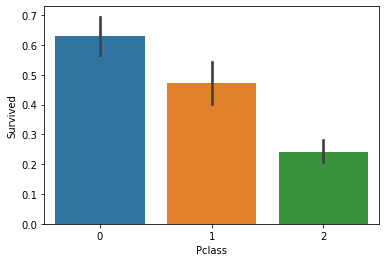

In [27]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=df)

0 --> First Class<br>
1 --> Second Class<br>
2 --> Third Class<br>
Seems like first class people had good chances of survival <br>


In [28]:
X= df[['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']]
y=df['Survived']

In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=104,
                                                    test_size=0.20)

#### H) Using the Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked features and ScikitLearn, generate a support vector machine (SVM) machine learning model with a linear basis function kernel to predict if a passenger survives. 


In [30]:
X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [31]:
X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [32]:
#Import svm model

from sklearn import svm

#Create a svm Classifier
model_1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_1.predict(X_test)


In [41]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)))
print('Model Accuracy: %.2f' % ((metrics.accuracy_score(y_test, y_pred))*100) ,'%')


Accuracy: 0.7653631284916201
Model Accuracy: 76.54 %


#### I. Perform k-fold cross validation (with 5 splits) on the model with the training set. What is the average and standard deviation of the accuracy of the model?

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

X_K = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_K

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,0.2750,0.125,0.000000,0.014151,2
1,0,0,0.4750,0.125,0.000000,0.139136,0
2,2,0,0.3250,0.000,0.000000,0.015469,2
3,0,0,0.4375,0.125,0.000000,0.103644,2
4,2,1,0.4375,0.000,0.000000,0.015713,2
...,...,...,...,...,...,...,...
886,1,1,0.3375,0.000,0.000000,0.025374,2
887,0,0,0.2375,0.000,0.000000,0.058556,2
888,2,0,0.3000,0.125,0.333333,0.045771,2
889,0,1,0.3250,0.000,0.000000,0.058556,0


In [43]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

# split()  method generate indices to split data into training and test set

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


In [44]:
X_K

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,0.2750,0.125,0.000000,0.014151,2
1,0,0,0.4750,0.125,0.000000,0.139136,0
2,2,0,0.3250,0.000,0.000000,0.015469,2
3,0,0,0.4375,0.125,0.000000,0.103644,2
4,2,1,0.4375,0.000,0.000000,0.015713,2
...,...,...,...,...,...,...,...
886,1,1,0.3375,0.000,0.000000,0.025374,2
887,0,0,0.2375,0.000,0.000000,0.058556,2
888,2,0,0.3000,0.125,0.333333,0.045771,2
889,0,1,0.3250,0.000,0.000000,0.058556,0


In [45]:
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# import numpy as np
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split

# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = svm.SVC(kernel='linear')
 
# result = cross_val_score(model , X_K, y, cv = kf)
 
# print("Avg accuracy: %.4f" % (result.mean()), '%')
# #print(type(result))

# print('Cross Validation accuracy: %.4f +/- %.4f' % (np.mean(result),np.std(result)))


In [47]:
# Implementing cross validation
import numpy as np


from sklearn.metrics import accuracy_score

k = 5
kf = KFold(n_splits=k, random_state=None)
model_2 = svm.SVC(kernel='linear')

acc_score = []
 
for train_index , test_index in kf.split(X_K):
    X_train , X_test = X_K.iloc[train_index,:],X_K.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model_2.fit(X_train,y_train)
    pred_values = model_2.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = (sum(acc_score)/k) * 100
 
print('Accuracy of Each Fold - {}'.format(acc_score))

print('Average Accuracy is: %.4f' % (avg_acc_score) ,'%')
print('Cross Validation Accuracy: %.4f +/- %.4f' % (np.mean(acc_score),np.std(acc_score)))
std = (np.std(acc_score)) * 100
print('Standard Deviation is: %.4f' % std)


Accuracy of Each Fold - [0.8156424581005587, 0.797752808988764, 0.7808988764044944, 0.7359550561797753, 0.8033707865168539]
Average Accuracy is: 78.6724 %
Cross Validation Accuracy: 0.7867 +/- 0.0277
Standard Deviation is: 2.7736


#### J) Use the trained model to predict the survival outcomes of the passengers in the/public/bmort/python/test.csv data set. Provide your answer as a Python list of 0s and 1s.

In [48]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [49]:
X_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Perform all preprocessing such as normalizing, and label encoding <br>

In [50]:
# Normalizing

df_new = X_test[['Age', 'SibSp', 'Parch', 'Fare']].copy()

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df_new)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df_new)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df_new.columns)

# visualize the data frame
df_scaled

,Age,SibSp,Parch,Fare
0,0.453947,0.000,0.000000,0.015282
1,0.618421,0.125,0.000000,0.013663
2,0.815789,0.000,0.000000,0.018909
3,0.355263,0.000,0.000000,0.016908
4,0.289474,0.125,0.111111,0.023984
...,...,...,...,...
413,NaN,0.000,0.000000,0.015713
414,0.513158,0.000,0.000000,0.212559
415,0.506579,0.000,0.000000,0.014151
416,NaN,0.000,0.000000,0.015713


In [51]:
# putting back the normalized values

X_test[['Age', 'SibSp', 'Parch', 'Fare']] = df_scaled[['Age', 'SibSp', 'Parch', 'Fare']]
# df['SibSp'] = df_scaled['SibSp']
# df['Parch'] = df_scaled['Parch']
# df['Fare'] = df_scaled['Fare']
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.453947,0.000,0.0,0.015282,Q
1,3,female,0.618421,0.125,0.0,0.013663,S
2,2,male,0.815789,0.000,0.0,0.018909,Q


In [52]:
# Label Encoding
# for 'Sex' Column

# Import label encoder

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sex', 'Pclass' and 'Embarked'

X_test['Sex']= label_encoder.fit_transform(X_test['Sex'])

X_test['Pclass']= label_encoder.fit_transform(X_test['Pclass'])

X_test['Embarked']= label_encoder.fit_transform(X_test['Embarked'])

X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,0.453947,0.000,0.0,0.015282,1
1,2,0,0.618421,0.125,0.0,0.013663,2
2,1,1,0.815789,0.000,0.0,0.018909,1


In [53]:
# replacing NaN values in 'Age' column

# now lets replace the null values in 'Age' column with mode value of the column

# mode value is
print(X_test['Age'].mode())

# add .mode()[0] as mode returns a series
X_test['Age'] = X_test["Age"].fillna(X_test['Age'].mode()[0])

print(len(X_test[X_test['Age'].isna()]['Age']))

0    0.276316
1    0.315789
Name: Age, dtype: float64
0


In [54]:
# checking for null values in any of the columns

print(X_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [55]:
# replacing NaN values in 'Fare' column

# now lets replace the null values in 'Fare' column with mode value of the column

# mode value is
print(X_test['Fare'].mode())

# add .mode()[0] as mode returns a series
X_test['Fare'] = X_test["Fare"].fillna(X_test['Fare'].mode()[0])

print(len(X_test[X_test['Fare'].isna()]['Fare']))

0    0.015127
Name: Fare, dtype: float64
0


In [56]:
# checking for null values in any of the columns

print(X_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [70]:
# make predictions using model_1
predictions_1 = model_1.predict(X_test)
print('Prediction of survival outcomes made my Model-1 \n\n', predictions_1)
print('-'*120)

# make predictions using model_2
predictions_2 = model_2.predict(X_test)
print('Prediction of survival outcomes made my Model-2, that used K-Fold Cross Validation\n\n', predictions_2)

Prediction of survival outcomes made my Model-1 

 [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
----------------------------------------------------------------------------------------------------